In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dat1 = pd.read_excel('pr9_2.xlsx')
dat2 = pd.read_excel('pr9_2.xlsx',sheet_name=1)

In [51]:
dat1.head(5)

Sequence                           Столбец1               Столбец2  \
0                              tr      D0X5A6  D0X5A6_VIBH1            
1                              tr  A0A061Q1E9      A0A061Q1E9_9VIBR    
2                              tr      K5UET0  K5UET0_9VIBR            
3                              tr  A0A0B4IY24      A0A0B4IY24_VIBHA    
4                              tr  A0A2N7N5S3      A0A2N7N5S3_9VIBR    

   Description                Score      E-value     N   Is in list  
0  PTS EIIB type-2 domain    1395.1            0.0  1.0        True  
1  Ascorbate-specific PTS    1395.1            0.0  1.0        True  
2  Ascorbate-specific per    1395.1            0.0  1.0        True  
3  Ascorbate-specific per    1395.1            0.0  1.0        True  
4  PTS ascorbate-specific    1395.1            0.0  1.0        True

In [23]:

dat1.columns

Index(['Sequence                       ', 'Столбец1', 'Столбец2',
       'Description             ', ' Score', '    E-value  ', 'N '],
      dtype='object')

In [14]:
dat2.head(5)

Entry                              Protein names  \
0  A0A444JPX8        PTS ascorbate-specific subunit IIBC   
1      Q98R12        TRANSPORT PROTEIN SGAT, LIPOPROTEIN   
2  A0A1Z1W5M5      PTS ascorbate transporter subunit IIC   
3      Q6LL39                      Putative SgaT protein   
4      Q9CMQ1  PTS EIIB type-2 domain-containing protein   

                                Organism  Length Taxonomic lineage (FAMILY)  \
0             Photobacterium sp. BEI 247     753               Vibrionaceae   
1  Mycoplasma pulmonis (strain UAB CTIP)     651           Mycoplasmataceae   
2                Streptomyces alboflavus     636          Streptomycetaceae   
3  Photobacterium profundum (strain SS9)     626               Vibrionaceae   
4    Pasteurella multocida (strain Pm70)     625            Pasteurellaceae   

  Taxonomic lineage (GENUS) Taxonomic lineage (PHYLUM)  \
0            Photobacterium             Proteobacteria   
1                Mycoplasma                Tenericutes   
2              Streptomyces             Actinobacteria   
3            Photobacterium             Proteobacteria   
4               Pasteurella             Proteobacteria   

     Cross-reference (Pfam)  
0  PF03611;PF00359;PF02302;  
1          PF03611;PF02302;  
2          PF03611;PF02302;  
3          PF03611;PF02302;  
4          PF03611;PF02302;

In [25]:
dat2.columns

Index(['Entry', 'Protein names', 'Organism', 'Length',
       'Taxonomic lineage (FAMILY)', 'Taxonomic lineage (GENUS)',
       'Taxonomic lineage (PHYLUM)', 'Cross-reference (Pfam)'],
      dtype='object')

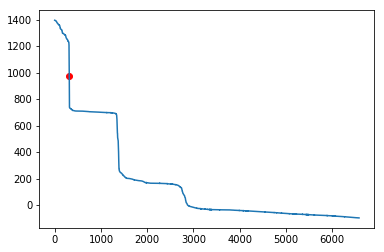

In [108]:
score=dat1[' Score'].sort_values(ascending=False)
plt.plot(score)
plt.scatter(315,dat1[' Score'][315], color='r')

In [47]:
inc = []
for i in dat1['Столбец1']:
    #print(i)
    r = False
    for i2 in dat2['Entry']:
        if i2 == i:
            #print(i2, ' - ', i)
            r=True
    inc.append(r)
    #if i in list(dat2['Entry']):
     #   print(i)
     #   inc.append(True)
    #else:
    #    inc.append(False)

In [48]:
len(inc)

6580

In [30]:
dat1['Столбец1'][1]

'A0A061Q1E9'

In [32]:
dat2['Entry'][1]

'Q98R12'

In [49]:
dat1['Is in list']=inc

In [50]:
print(dat1['Is in list'].sum())

347


In [88]:
TN=[]
TP=[]
FN=[]
FP=[]

In [89]:
count=0
count2=0
for i in range(len(dat1['Is in list'])-1,-1,-1):
    if dat1['Is in list'][i] == False:
        count+=1
    TN.append(count)
    if dat1['Is in list'][i]:
        #print(i)
        count2+=1
    FN.append(count2)
    #for i2 in range(len(dat1['Is in list']),i,-1):
        #if dat1['Is in list'][i2] == False:
            #count+=1
    #TN.append(count)
TN.reverse()
FN.reverse()

In [90]:
count1=0
count2=0
for i in range(len(dat1['Is in list'])):
    if dat1['Is in list'][i]:
        count1+=1
    TP.append(count1)
    if not dat1['Is in list'][i]:
        count2+=1
    FP.append(count2)

In [91]:
sensivity=[]
one_minus_specifity=[]
precision=[]
for i in range(len(dat1['Is in list'])):
    one_minus_specifity.append(1-(TN[i]/(TN[i]+FP[i])))
    sensivity.append(TP[i]/(TP[i]+FN[i]))
    precision.append(TP[i]/(TP[i]+FP[i]))

In [95]:
f1_score=[]
for i in range(len(dat1['Is in list'])):
    f=2*sensivity[i]*precision[i]/(sensivity[i]+precision[i])
    f1_score.append(f)

In [97]:
print(np.argmax(f1_score))

315


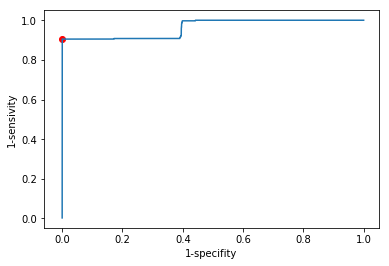

In [106]:
fig, ax = plt.subplots()
ax.plot(one_minus_specifity, sensivity)
ax.set_xlabel('1-specifity')
ax.set_ylabel('1-sensivity')
ax.scatter(one_minus_specifity[315],sensivity[315],color='r')

In [111]:
print(dat1[' Score'][315])

978.0


In [112]:
print(len(dat1[' Score'])-315)

6265


In [115]:
re=0
for i in range(315):
    re += dat1['Is in list']
print(dat1['Is in list'].sum())

347
